# K-means clustering in Python

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 01: importing the dataset


#### https://www.kaggle.com/chaandsheikh/instagram-visit-clustering

In [34]:
data = pd.read_csv('C:/Users/Vincent/Downloads/archive/Instagram visits clustering.csv')

In [35]:
data.head(20)

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
5,5,74,81.195314
6,6,83,88.119729
7,7,71,87.468356
8,8,42,80.829564
9,9,79,25.966622


In [36]:
# data = data.sample(frac = 1) 

## Step 02: Extraction of data

In [37]:
X = data.iloc[:, [1, 2]].values

In [38]:
X[:10]

array([[ 63.        ,  24.05070845],
       [ 61.        ,  25.22329005],
       [104.        ,  18.52824526],
       [ 82.        ,  86.89023241],
       [ 14.        ,  31.49239692],
       [ 74.        ,  81.19531414],
       [ 83.        ,  88.11972945],
       [ 71.        ,  87.4683564 ],
       [ 42.        ,  80.829564  ],
       [ 79.        ,  25.96662164]])

## Step 04: Apply DBSCAN clustering

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [40]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [41]:
dbscan.fit(X)

DBSCAN()

In [42]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [43]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [44]:
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 17
Estimated number of noise points: 2500


## Step 05: Visualization

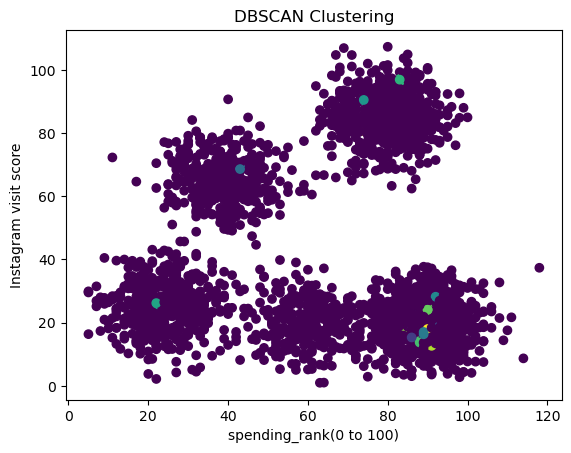

In [45]:
# Visualize the clusters and noise points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('spending_rank(0 to 100)')
plt.ylabel('Instagram visit score')
plt.show()

# Extracting the cluster data

In [46]:
import numpy as np

# Extract all data points belonging to a specific cluster (e.g., cluster 0)
cluster_0_indices = np.where(labels == 0)
cluster_0_data_points = X[cluster_0_indices]


print("Data points in Cluster 1:")
print(cluster_0_data_points)




Data points in Cluster 1:
[[86.         18.23979234]
 [86.         18.50963704]
 [86.         18.47321996]
 [86.         17.87451669]
 [86.         17.90527498]]


In [53]:
data1 = data.to_numpy()


array([ 0.        , 63.        , 24.05070845])

In [ ]:
# Fi

In [54]:
user_ids_cluster1 = []

for cluster1_point in cluster_0_data_points:
    for data1_row in data1:
        if np.array_equal(cluster1_point[:2], data1_row[1:]):
            user_ids_cluster1.append(data1_row[0])

# Now, user_ids_cluster1 will contain the User IDs for the data points in Cluster 1
print(user_ids_cluster1)



[86.0, 207.0, 1042.0, 1243.0, 1905.0]


In [55]:
# Extract noise points (cluster label -1)
# noise_indices = np.where(labels == -1)
# noise_data_points = X[noise_indices]
# noise_data_points